In [1]:
import numpy as np
import pandas as pd
import keras 
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import os
import random

In [2]:
df = pd.read_csv("train.csv")
base_path = "./images/0/"

In [3]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [4]:
df = df.loc[df["id"].str.startswith(('00', '7d', 'b1'), na=False), :]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [5]:
num_classes

13484

In [6]:
num_data

18321

In [7]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data

,count
landmark_id,
138982,88
126637,29
83144,26
194914,17
149980,16
...,...
76707,1
76738,1
76739,1


In [8]:
data.reset_index(inplace=True)
data.columns=["landmark_id","count"]
data

,landmark_id,count
0,138982,88
1,126637,29
2,83144,26
3,194914,17
4,149980,16
...,...,...
13479,76707,1
13480,76738,1
13481,76739,1
13482,76752,1


(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0589e+04, 0.0000e+00,
        0.0000e+00, 1.9450e+03, 0.0000e+00, 0.0000e+00, 5.5800e+02,
        0.0000e+00, 0.0000e+00, 2.1100e+02, 0.0000e+00, 0.0000e+00,
        8.1000e+01, 0.0000e+00, 0.0000e+00, 3.3000e+01, 0.0000e+00,
        0.0000e+00, 2.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

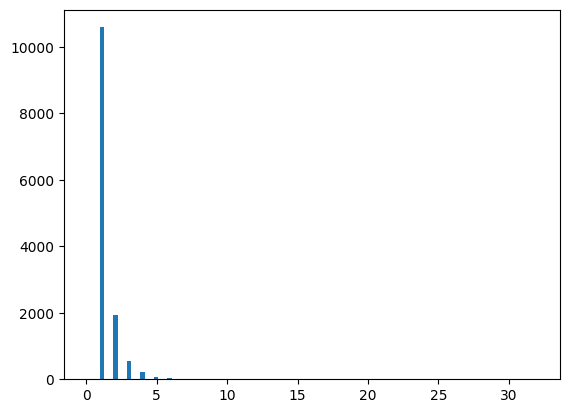

In [9]:
plt.hist(data['count'], 100, range=(0,32), label = 'test')

In [10]:
data['count'].between(0,5).sum()

13384

In [11]:
data['count'].between(5,10).sum()

163

(array([1., 6., 1., ..., 1., 1., 3.]),
 array([2.20000e+01, 2.70000e+01, 6.00000e+01, ..., 2.03045e+05,
        2.03071e+05, 2.03085e+05]),
 <BarContainer object of 13483 artists>)

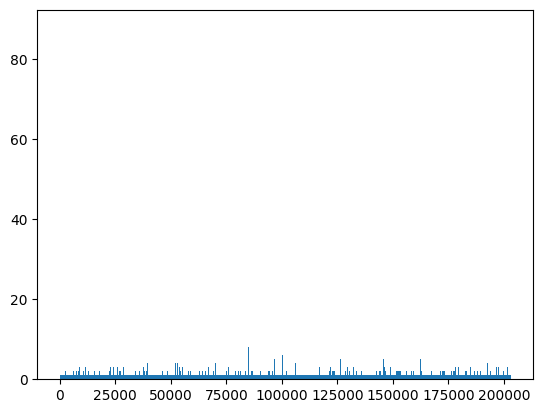

In [12]:
plt.hist(df["landmark_id"], bins=df["landmark_id"].unique())

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on your labels to create a mapping
label_encoder.fit(df['landmark_id'])

# Encode labels
encoded_labels = label_encoder.transform (df['landmark_id'])

# Decode labels (if needed)
decoded_labels = label_encoder.inverse_transform(encoded_labels)


In [14]:
def encode_label(label):
    return lencoder.transform(label)

In [15]:
def decode_label(label):
    return lencoder.inverse_transform(label)

In [16]:
def get_image_from_numbers(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    full_path = os.path.join(base_path,f1,f2,f3, fname)
    im = cv2.imread(full_path)
    return im, label

4 Sample images from random classes


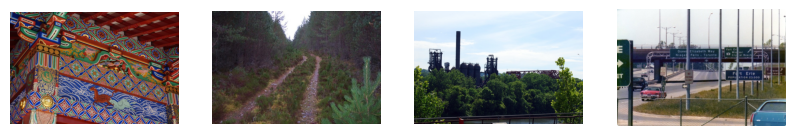

In [17]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

base_path = 'images/0/0'  # Replace with the actual path to your image directory

print("4 Sample images from random classes")
fig = plt.figure(figsize=(10, 10))

# Get a list of subdirectories (class folders)
class_folders = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

for i in range(1, 5):
    random_class = random.choice(class_folders)
    class_folder = os.path.join(base_path, random_class)
    random_image = random.choice(os.listdir(class_folder))
    img = np.array(Image.open(os.path.join(class_folder, random_image)))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [18]:
#BUILD THE MODEL
from keras.applications.vgg19 import VGG19
import tensorflow as tf
from keras.layers import *
from keras import Sequential
tf.compat.v1.disable_eager_execution()

In [19]:
# Hyper parameter
learning_rate = 0.0001
dacay_speed = 1e-6
momentum = 0.9
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)

In [20]:
model = Sequential()
for index, layer in enumerate(source_model.layers[:-1]):
    if index == len(source_model.layers) - 25:
        model.add(BatchNormalization())
    model.add(layer)

num_classes = 15  # Define the number of classes in your problem

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)

In [21]:

optim1 = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optim1, loss=loss_function, metrics=["accuracy"])


In [27]:
import cv2

def image_reshape(im, target_size):
    if not im is None and not im.size == 0:
        return cv2.resize(im, target_size) / 255.0
    else:
        return None

In [28]:
from sklearn.preprocessing import LabelEncoder

def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []

    end_img = start + batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_numbers(n, dataframe)
        
        # Check if im is None (empty image)
        if im is not None:
            im = image_reshape(im, (244, 244)) / 255.0
            image_array.append(im)
            label_array.append(label)

    # Create and fit a LabelEncoder
    lencoder = LabelEncoder()
    lencoder.fit(label_array)  # Replace your_labels with your actual labels

    # Encode labels
    encoded_labels = lencoder.transform(label_array)

    return np.array(image_array), np.array(encoded_labels)


In [29]:
#Split
import pandas as pd

# Load your data from a CSV file into a DataFrame
df = pd.read_csv('train.csv')

# Split the DataFrame into train and validation sets
train, val = np.split(df.sample(frac=1), [int(0.8 * len(df))])

# Check the lengths of the train and validation sets
print(len(train))
print(len(val))

1264376
316094


In [30]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

In [31]:
for e in range(epochs):
    print("Epoch :" + str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac=1)
    for it in range(int(np.ceil(len(train) / batch_size))):
        X_train, y_train = get_batch(train, it * batch_size, batch_size)
        if X_train is not None:  # Check if X_train is not None
            model.train_on_batch(X_train, y_train)

model.save("Model")

Epoch :1/1


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (0, 1)

In [ ]:
#test
import numpy as np
import pandas as pd
batch_size = 16
# Define or load your validation dataset
df = pd.read_csv("train.csv")
X_val, y_val =plt.hist(df["landmark_id"], bins=df["landmark_id"].unique())
errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):
    X_val, y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(X_val)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])

In [32]:
# Define an example list of predictions
good_preds = [
    [1, 0.9],
    [2, 0.85],
    [3, 0.92],
    # Add more predictions here
]

# Convert to NumPy array and sort by confidence score in descending order
good_preds = np.array(sorted(good_preds, key=lambda x: x[1], reverse=True))

# Now you can access the sorted predictions in good_preds
print(good_preds)


[[3.   0.92]
 [1.   0.9 ]
 [2.   0.85]]


In [33]:
len(good_preds)

3

In [34]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Check if good_preds is empty before proceeding
if good_preds.size == 0:
    print("good_preds is empty. Please ensure it contains data.")
else:
    fig = plt.figure(figsize=(10, 10))

    for i in range(7, 12):
        if i < len(good_preds):  # Check if the index is within bounds
            n = int(good_preds[i, 0])  # Get the predicted class label from the first column
            img, lbl = get_image_from_numbers(n, val)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Create a subplot
            subplot_idx = i - 6  # Adjust the subplot index
            ax = fig.add_subplot(1, 5, subplot_idx)

            # Display the image
            ax.imshow(img)

            # Get the confidence score from the second column
            confidence_score = good_preds[i, 1]

            # Convert lbl to an array and reshape it
            lbl2 = np.array(int(good_preds[i, 0])).reshape(1, 1)

            # Count the number of samples in the class
            sample_cnt = list(df.landmark_id).count(lbl)

            # Set the title
            ax.set_title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt) + "\nConfidence Score: " + str(confidence_score))

            ax.axis('off')

    plt.show()


<Figure size 1000x1000 with 0 Axes>